In [2]:
#import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gmaps

In [3]:
#create dataframe for our data
home_df = pd.read_csv('Neighborhood_Zhvi_AllHomes.csv')

In [4]:
#filter for data just in Atlanta. Also drop data that does not have data as of Jan 2015
home_df = home_df[home_df["City"] == 'Atlanta']
home_df = home_df.dropna(axis = 0, subset=["2015-01"])

In [5]:
#create summary columns for our dataset
home_df["PercentChange"] = 0
home_df["InitialValue"] = 0
home_df["FinalValue"] = 0
home_df["MonthCount"] = 0


#scripting to calculate Initial Value (median house value as of 01-2015), Final Median Housing Value, Number of Months of Data
#and Percent Change over data range
for index, row in home_df.iterrows():
    PercentChange = 0
    InitialValue = 0
    FinalValue = 0
    month = 1
    month_count = 0
    year = 2015
    while (month != 12 or year != 2019):
        if month_count >= 1:
            month_count+=1
        year_str = str(year)
        if month < 10:
            month_str = '0' + str(month)
        else:
            month_str = str(month)
        if not np.isnan(home_df.loc[index, year_str + '-' + month_str]) and InitialValue == 0:
            InitialValue = home_df.loc[index, year_str + '-' + month_str]
            home_df["InitialValue"][index] = InitialValue
            month_count+=1
        if month == 11 and year == 2019:
            home_df["FinalValue"][index] = home_df.loc[index, year_str + '-' + month_str] 
            home_df["MonthCount"][index] = month_count
        if month == 12:
            month = 1
            year+=1
        else:
            month+=1

home_df["Percent Change"] = (home_df["FinalValue"] - home_df["InitialValue"]) / home_df["InitialValue"]  * 100
cols = ["RegionName", "City", "State", "InitialValue", "FinalValue", "Percent Change"]
home_df = home_df[cols]

C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
#Define a bottom tier as regions that had initial value in bottom 30% of neighborhoods at beginning of date range
bottom_tier = home_df[home_df["InitialValue"] <= home_df.quantile(0.3)["InitialValue"] ]

In [7]:
#create CSV files for analysis
home_df.to_csv('HomeValues.csv')
bottom_tier.to_csv('BottomTierHomeValues.csv')

In [8]:
bottom_tier

,RegionName,City,State,InitialValue,FinalValue,Percent Change
624,Midtown,Atlanta,GA,238817,323293,35.372691
767,Downtown,Atlanta,GA,163686,228871,39.823198
1077,Old Fourth Ward,Atlanta,GA,206508,317833,53.908323
1726,Pine Hills,Atlanta,GA,216510,296854,37.108679
2881,Lindbergh,Atlanta,GA,180296,264867,46.906753
3692,Peachtree Heights West,Atlanta,GA,256576,333718,30.065945
3845,Underwood Hills,Atlanta,GA,238436,347936,45.924273
4629,Summerhill,Atlanta,GA,235179,364488,54.983226
5271,Princeton Lakes,Atlanta,GA,178874,228343,27.655780
5610,Bolton,Atlanta,GA,211062,311104,47.399342


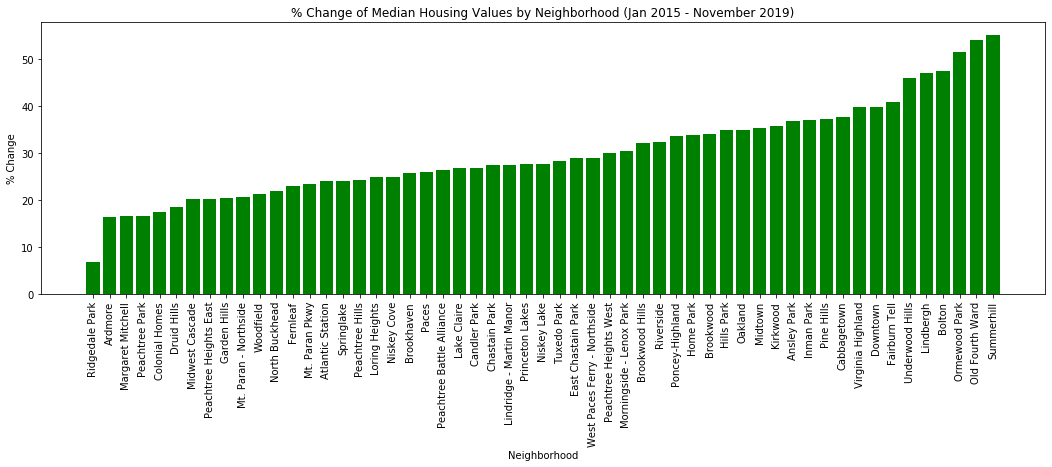

In [9]:
#create plot for changing housing value
home_df_sorted= home_df.sort_values(by=["Percent Change"])

#set figure size
plt.subplots(figsize = (18,5))

#create bar graph with RegionName as the x-axis and Height of bar graphs set to the percent increase in housing value
plt.bar(x=home_df_sorted["RegionName"], height = home_df_sorted["Percent Change"], color='green')

#create vertical ticks to make graph easier to read
plt.xticks(rotation="vertical")

#create title for graph
plt.title("% Change of Median Housing Values by Neighborhood (Jan 2015 - November 2019)")

#Label x and y axes with Neighborhood and % Change respectively
plt.xlabel("Neighborhood")
plt.ylabel("% Change")

#Save figure
plt.savefig("ChangeHousingValues.png", bbox_inches = "tight")

,RegionID,RegionName,SizeRank,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,102001,United States,0,204708,203742,202810,200931.3333,199143.6667,197420,195791.6667,...,237154,237945.3333,238624.6667,239270,239882.0000,240460.3333,241057.0000,241730.6667,242470.6667,243225.3333
1,394347,"Atlanta, GA",9,193619,192713,191834,190368.3333,189135.3333,188028,186794.6667,...,229316,230491.3333,231669.6667,232602,232897.6667,233357.6667,234031.6667,235044.0000,235879.0000,236768.6667
